# BASIC GRAY LEVEL TRANSFORMATION.

All image processing techniques focused on gray level transformation as it operates directly on pixels. The gray level image involves 256 level of gray in a histogram, horizontal axis spans from 0 to 255, and the vertical axis depends on the number of pixels in the image.
There are three types of transformation: Linear,Logarithmic,Power-law. 

AIM: To perform the basic gray level transformation
    
    a.	Image negative
    b.	Log transformation
    c.	Antilog transformation
    d.	Power log transformation
    e.	Contrast Stretching
    f.	Gray level Slicing


# Image Negative

In [1]:
#importing files
import numpy as np
import cv2
import matplotlib.pyplot as plt

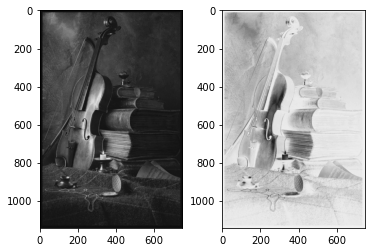

In [2]:
img = cv2.imread('EXP5.jpg')
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.imshow(img2,cmap='gray')
L=256
def Image_Neg(img2):
    r,c=np.shape(img2)
    #output=np.zeros([r,c])
    for i in range(r):
        for j in range(c):
            S=int(L-1- img2[i][j])
            img2[i][j]=S
    plt.subplot(1,2,2)
    plt.imshow(img2,cmap='gray')
Image_Neg(img2)

.

# Log Transformation

The low intensity value in the input image are mappped to the wider range of the output level. The opposite is true for the higher values.

s=T(r)=c*log(1+r)

above is the formula of log tranformation we add 1 in order to avoid the problem of infinity as log0=infinity 

c=255/(log(1+max_input_values))

It basically E X P A N D S the dark pixels in the image while compressing the brighter pixels

In [3]:
#importing files
from skimage import io
from matplotlib.colors import NoNorm
import warnings

for an 8 bit image the  max intensity is (2^8)-1=255

therefore we have a constant c as

c=255/(log(1+max_input_values))

In [4]:
r=np.arange(0,256)
c=255/(np.log(1+255))
y=c*np.log(1+r)

# log

Text(0, 0.5, 'output pixel value')

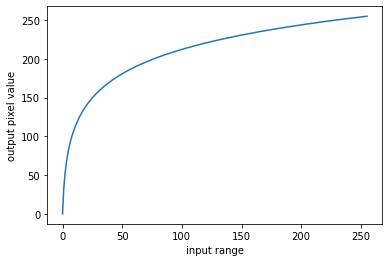

In [5]:
plt.plot(r,y);
plt.xlabel("input range")
plt.ylabel("output pixel value")

as seen above the log value of the image will increase drastically for values between 0-50

but on the higher end the log values are quite stable

In [6]:
#reading image
img=io.imread("EXP5.jpg")

In [7]:
warnings.filterwarnings("ignore")
#Applying Log traformation method
log_img=c*np.log(img+1)

#float value will be converted to int
log_img=np.array(log_img,dtype=np.uint8)

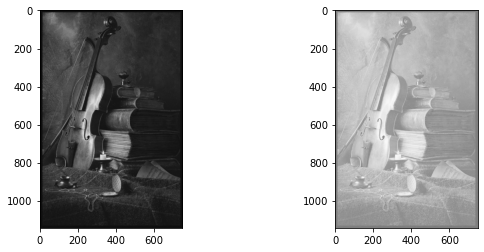

In [8]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(log_img)
plt.show()

# Anti-Log

In [9]:
#inverse log
r=np.arange(0,256)
c=255/(np.log(1+255))

y=c*np.log(1+r)        #formula for log transform

yi=np.exp(r)**(1/c)-1   #formula for inverse log
#for inverse log we take the exponential and raise it to 1/c

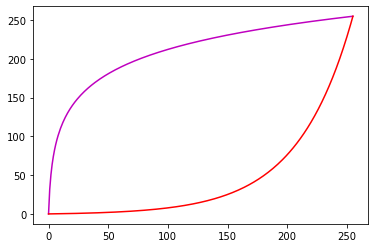

In [10]:
plt.plot(r,y,color='m');
plt.plot(r,yi,color='r');

In [11]:
inlog_img=np.exp(img+1)**(1/c)-1 

#float value will be converted to int
inlog_img=np.array(inlog_img,dtype=np.uint8)

warnings.filterwarnings("ignore")

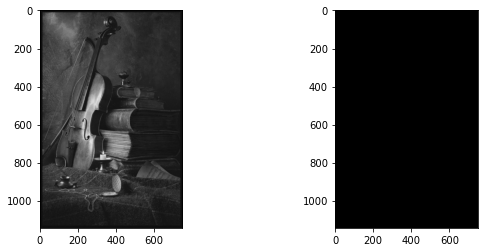

In [12]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(inlog_img)
plt.show()

inverse log is used for lighter images

log transform is used for darker images

.

# Power law Transformation

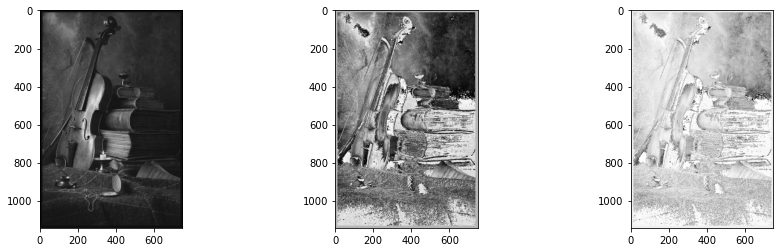

In [13]:
img = cv2.imread('EXP5.jpg')
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.imshow(img2,cmap='gray')
L=256

gamma=0.5
def Power_L(img2):
    r,c=np.shape(img2)
    #output=np.zeros([r,c])
    for i in range(r):
        for j in range(c):
             sv=int(img2[i][j])/L
             S=int(c*sv**gamma)
             img2[i][j]=S        
    plt.subplot(1,3,2)
    plt.imshow(img2,cmap='gray')             
Power_L(img2) 

gamma2=0.06
def Power_L(img2):
    r,c=np.shape(img2)
    #output=np.zeros([r,c])
    for i in range(r):
        for j in range(c):
             sv=int(img2[i][j])/L
             S=int(c*sv**gamma2)
             img2[i][j]=S        
    plt.subplot(1,3,3)
    plt.imshow(img2,cmap='gray')             
Power_L(img2) 
 

.

# Contrast stretching

rmin
60
rmax
200


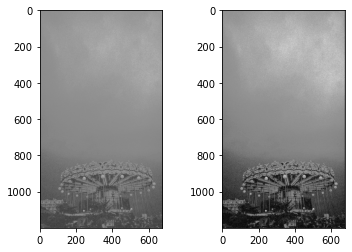

In [14]:
L=256
img = cv2.imread('cEXP5.jpg')
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.imshow(img2,cmap='gray')
def Contrast_Str(img2,rmin,rmax):
    r,c=np.shape(img2)
    #output=np.zeros([r,c])
    for i in range(r):
        for j in range(c):
             CS=int(rmin*((rmax-img2[i][j])/(rmax-rmin))+rmax*((img2[i][j]-rmin)/(rmax-rmin)))
             if(CS>=rmax):
                CS=rmax
             if(CS<=rmin):
                CS=rmin
             img2[i][j]=CS        
    plt.subplot(1,2,2)
    plt.imshow(img2,cmap='gray') 
print("rmin")
rmin=int(input())
print("rmax")
rmax=int(input())
Contrast_Str(img2,rmin,rmax) 

#60,200

.

# Gray Level Slicing

minimum range
20
maximum range
190


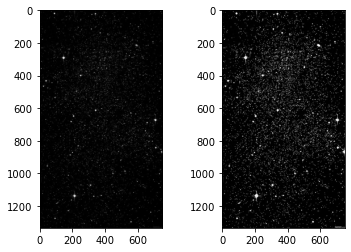

In [15]:
img = cv2.imread('grayslicing.jpg')
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.subplot(1,2,1)
plt.imshow(img2,cmap='gray')
print("minimum range")
min_range=int(input())
print("maximum range")
max_range=int(input())
r,c=np.shape(img2)
for i in range(r):
        for j in range(c):
             if img2[i][j]>min_range and img2[i][j]<max_range:
                    img2[i][j]=255
             else:
                img2[i][j]= img2[i][j]
plt.subplot(1,2,2)
plt.imshow(img2,cmap='gray');

#20 190